## Question: Unsupervised Learning

(a) Data Exploration

  (1) Load data from ‘wine.data’ file and delete the label column, since we only need the 13 features for unsupervised learning.

  (2) Plot the distribution histograms of the 13 variables. Provide a brief discussion on your intuition regarding the variables and the resulting histograms.

  (3) Visualize the correlation matrix of all the variables with a seaborn heatmap and discuss potential associations between the variables.
  
  (4) Consider data normalization to avoid artificially assigning higher importance to features of larger range

In [22]:
!pip install ucimlrepo pandas matplotlib scikit-learn numpy

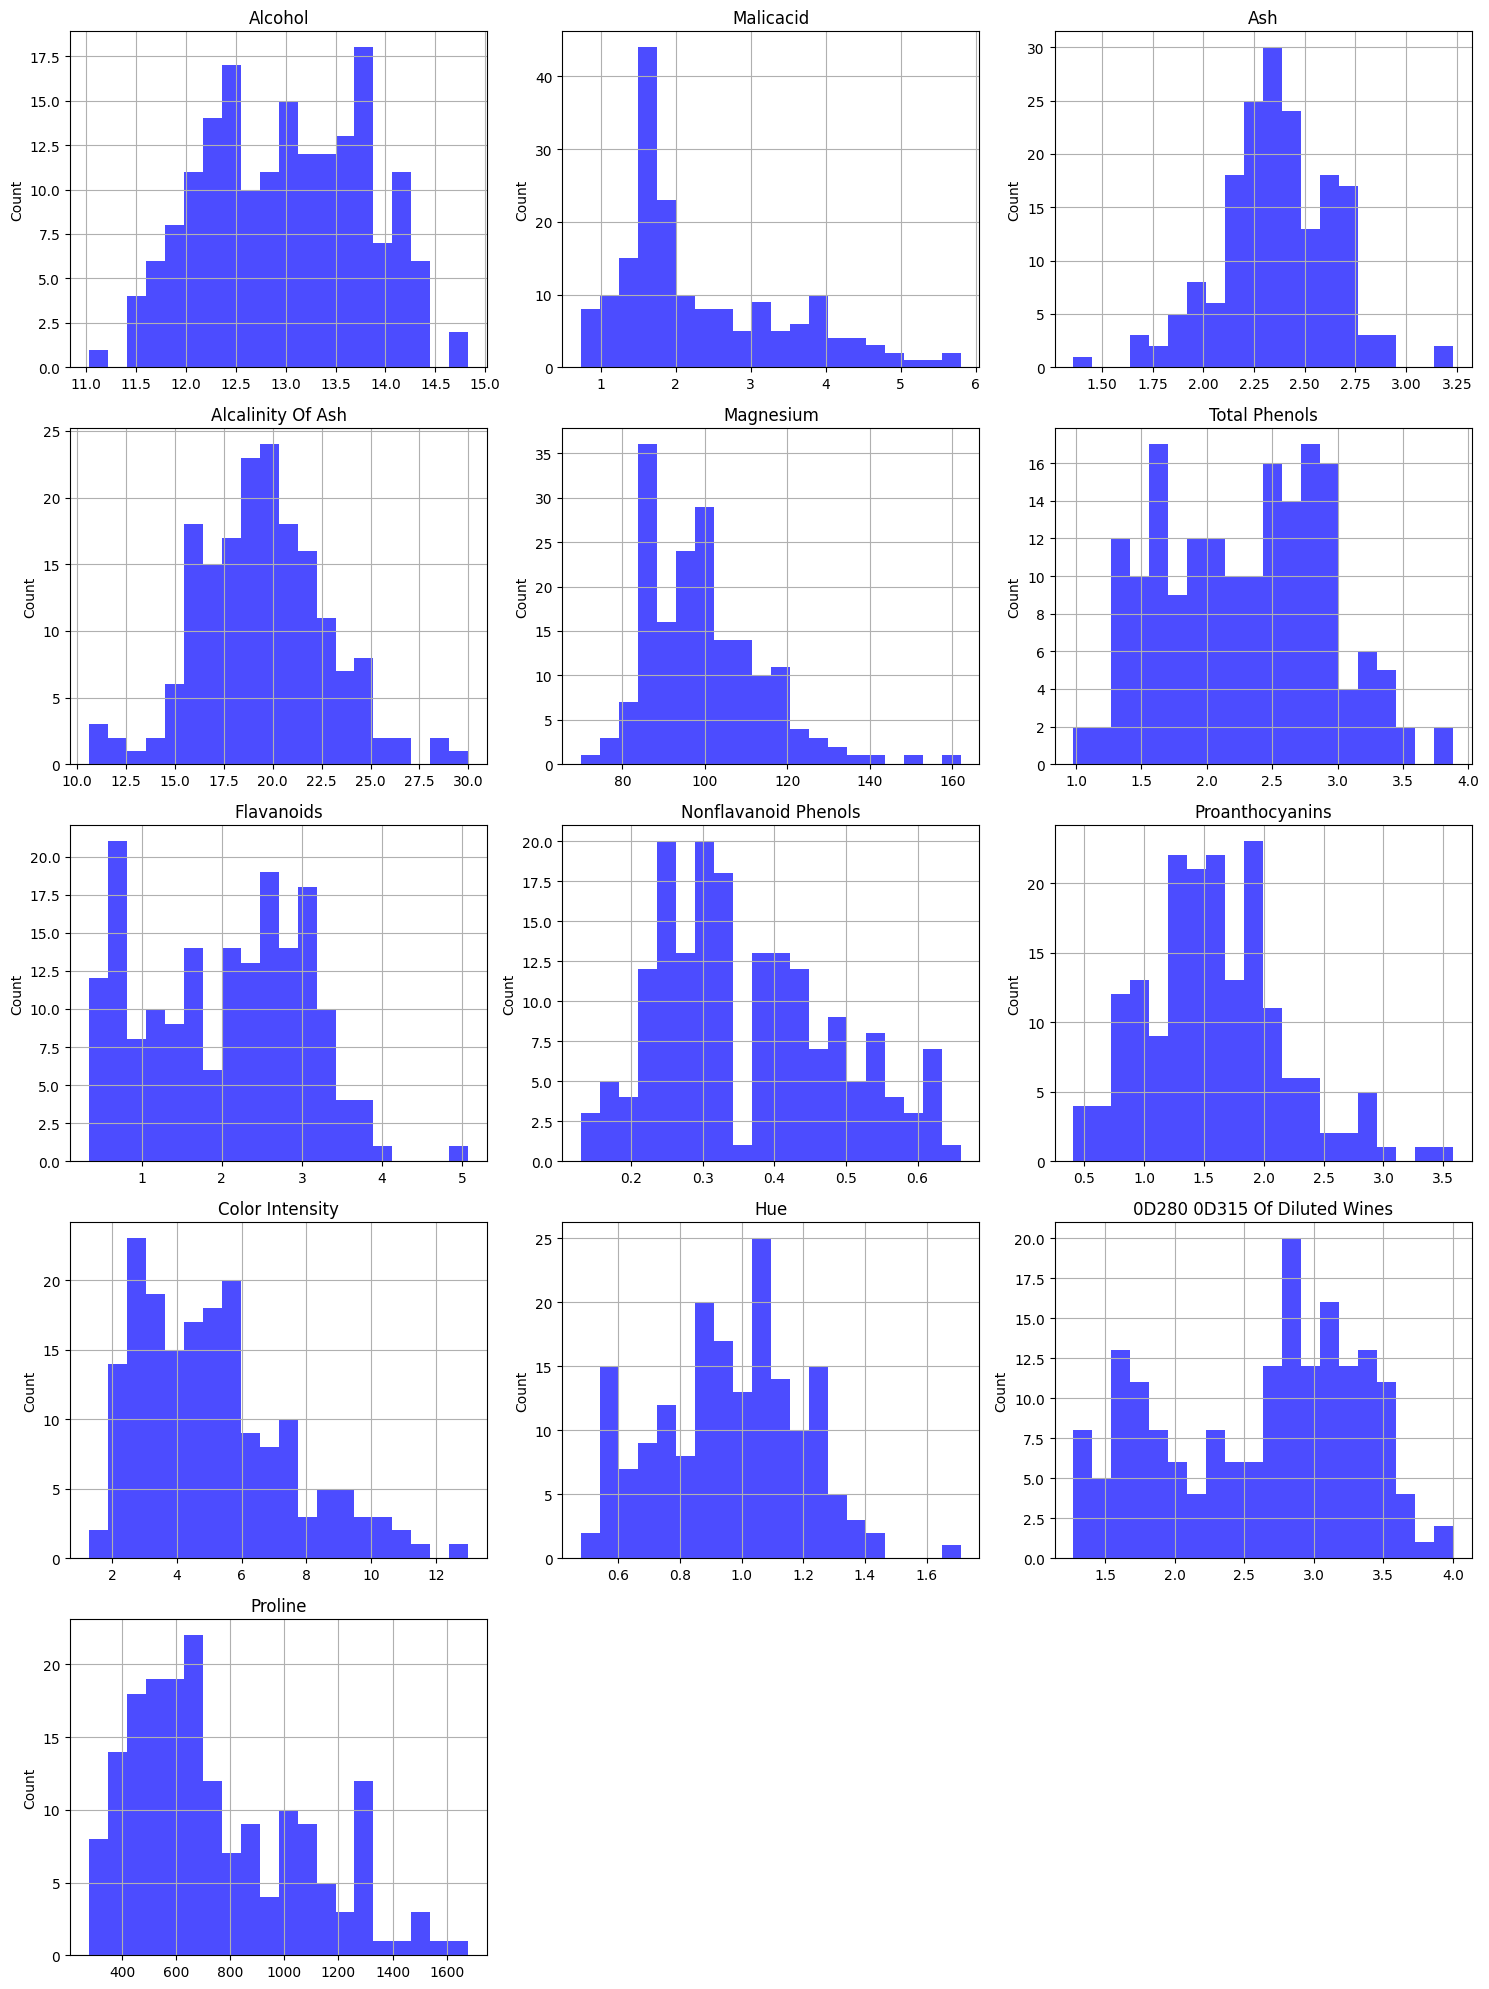

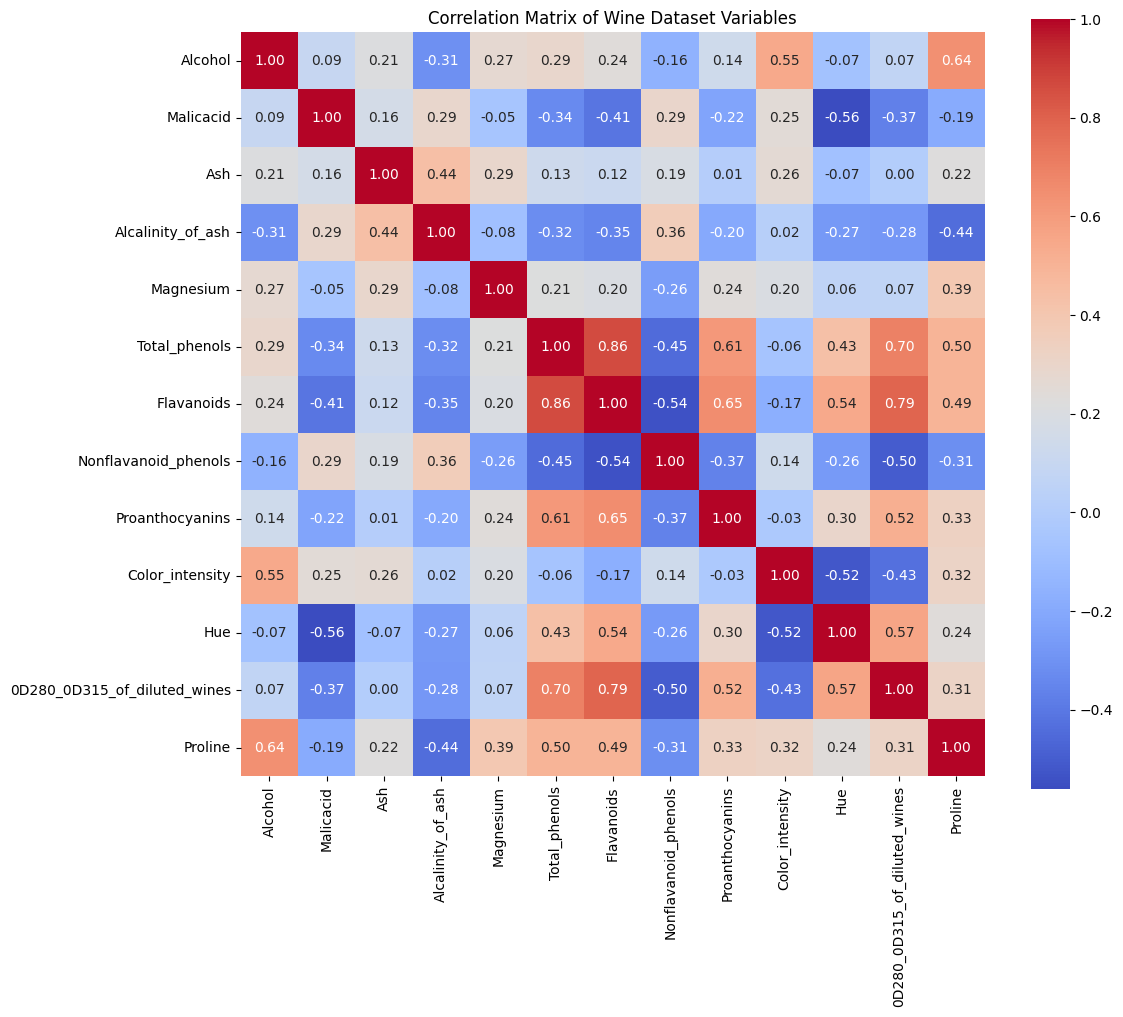

In [23]:
# Get python modules
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.patches as patches
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


# Step 1


# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

 # Step 2

# Plot histograms for each feature
fig, axes = plt.subplots(5, 3, figsize=(15, 20))
# Flatten the array of axes
axes = axes.ravel()

for i, col in enumerate(X.columns):
    X[col].hist(ax=axes[i], bins=20, alpha=0.7, color='blue')
    axes[i].set_title(col.replace('_', ' ').title())
    axes[i].set_ylabel('Count')

# Remove extra subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Step 3



# Compute the correlation matrix
corr_matrix = X.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Matrix of Wine Dataset Variables")
plt.show()

# Step 4

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Scale the data
wine_min_max_normalized = min_max_scaler.fit_transform(X)

# Create a DataFrame for the Min-Max normalized data
wine_min_max_normalized_df = pd.DataFrame(wine_min_max_normalized, columns=X.columns)


Step 2:

Alcohol: The distribution is somewhat symmetric probably becasuse most wines have a similar amount of alcohol.

Malic Acid: This histogram is left-skewed, suggesting that most wines have low to moderate levels of malic acid, with few wines having high amounts.

Ash: This variable appears quite normally distributed, indicating that there is a consistent presence of ash content across wines.

Alcalinity of Ash: The histogram shows a slight left skew, indicating that most wines have a moderate to low alkalinity level.

Magnesium: Another left-skewed histogram, suggesting that there is a consistent amount of magnesium across samples.

Total Phenols: This histogram is slightly left-skewed.

Flavanoids: The distribution is left-skewed.

Nonflavanoid Phenols: This variable is somewhat uniformly distributed with a slight left skew.

Proanthocyanidins: This variable shows a left-skewed distribution.

Color Intensity: This histogram is left-skewed, indicating that most wines have a moderate color intensity.

Hue: The distribution here is somewhat normally distributed but it is weighted slightly to the left.

OD280/OD315 of Diluted Wines: This is right-skewed histogram indicating that most wines had higher Od280/Od315

Proline: Highly left-skewed, indicating that while most wines have low levels of proline, a few have very high levels.

Step 3:

These are all the Variables that have high correaltion.

Alcohol:Color Intensity, Proline

Total Phenols: Flavanoids Proanthocyanins OD280/OD315 of Diluted Wines

Flavanoids: Total Phenols Proanthocyanins Hue OD280/OD315 of Diluted Wines

Proanthocyanins: Total Phenols Flavanoids OD280/OD315 of Diluted Wines

Color Intensity: Alcohol

Hue: Flavanoids OD280/OD315 of Diluted Wines

OD280/OD315 of Diluted Wines: Total Phenols Flavanoids Proanthocyanins Hue

Proline: Alcohol

(b) K-Means Clustering Use the k-means clustering algorithm to cluster the wine data based on all the variables

  (1) Choosing Number of Cluster Experiment with different numbers of clusters and use the Elbow method to identify the optimal number of clusters.

  (2) K-Means Results Report the number of wines that were assigned to each cluster, the centroid of each cluster, and the inertia.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

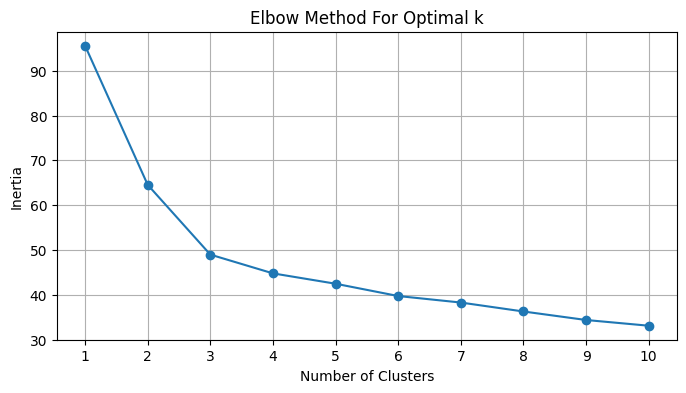

cluster 1 wine count: 62
cluster 2 wine count: 55
cluster 3 wine count: 61
cluster 1 centroid: [0.31137521 0.23689915 0.47291703 0.49991686 0.2477209  0.45305895
 0.38240098 0.4117468  0.39742546 0.14773478 0.47351167 0.58897554
 0.15640099]
cluster 2 centroid: [0.544689   0.47844053 0.56013612 0.53833177 0.31146245 0.24476489
 0.10713464 0.61852487 0.22827646 0.4826404  0.19254989 0.16090576
 0.24739982]
cluster 3 centroid: [0.70565142 0.24842869 0.58490401 0.3444313  0.41072701 0.64211419
 0.55467939 0.30034024 0.47727155 0.35534046 0.47780888 0.69038612
 0.59389397]
Inertia: 48.96051713667649


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
# Experiment with different numbers of clusters for K-Means and use the Elbow method

# Step 1

inertias = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(wine_min_max_normalized_df)
    inertias.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, inertias, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

# Step 2

# Apply K-Means with the optimal number of clusters (k=3)
kmeans_optimal = KMeans(n_clusters=3, random_state=42)
kmeans_optimal.fit(wine_min_max_normalized_df)

# Results of K-Means clustering
cluster_counts = np.bincount(kmeans_optimal.labels_)
cluster_centroids = kmeans_optimal.cluster_centers_
inertia = kmeans_optimal.inertia_

print("cluster 1 wine count:", cluster_counts[0])
print("cluster 2 wine count:", cluster_counts[1])
print("cluster 3 wine count:", cluster_counts[2])

print("cluster 1 centroid:", cluster_centroids[0])
print("cluster 2 centroid:", cluster_centroids[1])
print("cluster 3 centroid:", cluster_centroids[2])

print("Inertia:", inertia)




From the plot, there's a noticeable elbow around k = 3, suggesting that 3 clusters might be a good choice for this dataset. This is where the rate of decrease in inertia appears to slow down significantly, indicating that I will probably get diminishing returns if I increasing the number of clusters beyond this point.

(c) Gaussian Mixture Model Use the GMMs to cluster the wine data based on all the variables.

(1) Choosing Number of Cluster The number of Gaussian mixtures can be close to
the optimal number of clusters found above. To make sure, you can use Akaike information criterion (AIC) and Bayesian information criterion (BIC) to select the number of clusters.

(2) GMM Results

• Report the mean and covariance for each Gaussian mixture component and discuss your findings. Note: You can use a heatmap to visualize the covariance matrices of the GMM, instead of printing their actual values.

• Compute the log-likelihood of each data sample belonging to the GMM. Plot and discuss the histogram of the resulting log-likelihood values.

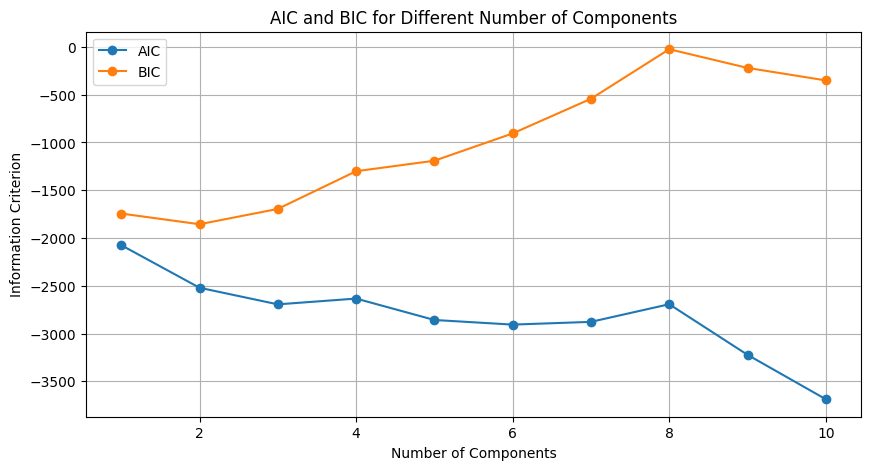

In [32]:
# Step 1

# Determine the optimal number of components for GMM using AIC and BIC
aic_values = []
bic_values = []
components_range = range(1, 11)

# Loop through each value in the components_range list
for k in components_range:
    # Create a Gaussian Mixture Model with 'k' components and set random_state to 42 for reproducibility
    gmm = GaussianMixture(n_components=k, random_state=42)
    # Fit the Gaussian Mixture Model to the wine data that has been min-max normalized
    gmm.fit(wine_min_max_normalized_df)
    # Calculate and append the Akaike Information Criterion (AIC) value
    aic_values.append(gmm.aic(wine_min_max_normalized_df))
    # Calculate and append the Bayesian Information Criterion (BIC) value
    bic_values.append(gmm.bic(wine_min_max_normalized_df))

# Plot AIC and BIC values
plt.figure(figsize=(10, 5))
plt.plot(components_range, aic_values, label='AIC', marker='o')
plt.plot(components_range, bic_values, label='BIC', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion')
plt.title('AIC and BIC for Different Number of Components')
plt.legend()
plt.grid(True)
plt.show()

Considering AIC continues to decrease as the number of components increases maybe a more complex model would fit the data better but it would run the risk of overfitting I think.

Based off BIC and the hint given in the prompt about the number of Gaussian mixtures can being close to the optimal number of clusters found above, I believe the optimal number of clusters will be 3 as there is also an elbow at 3 in the BIC line.

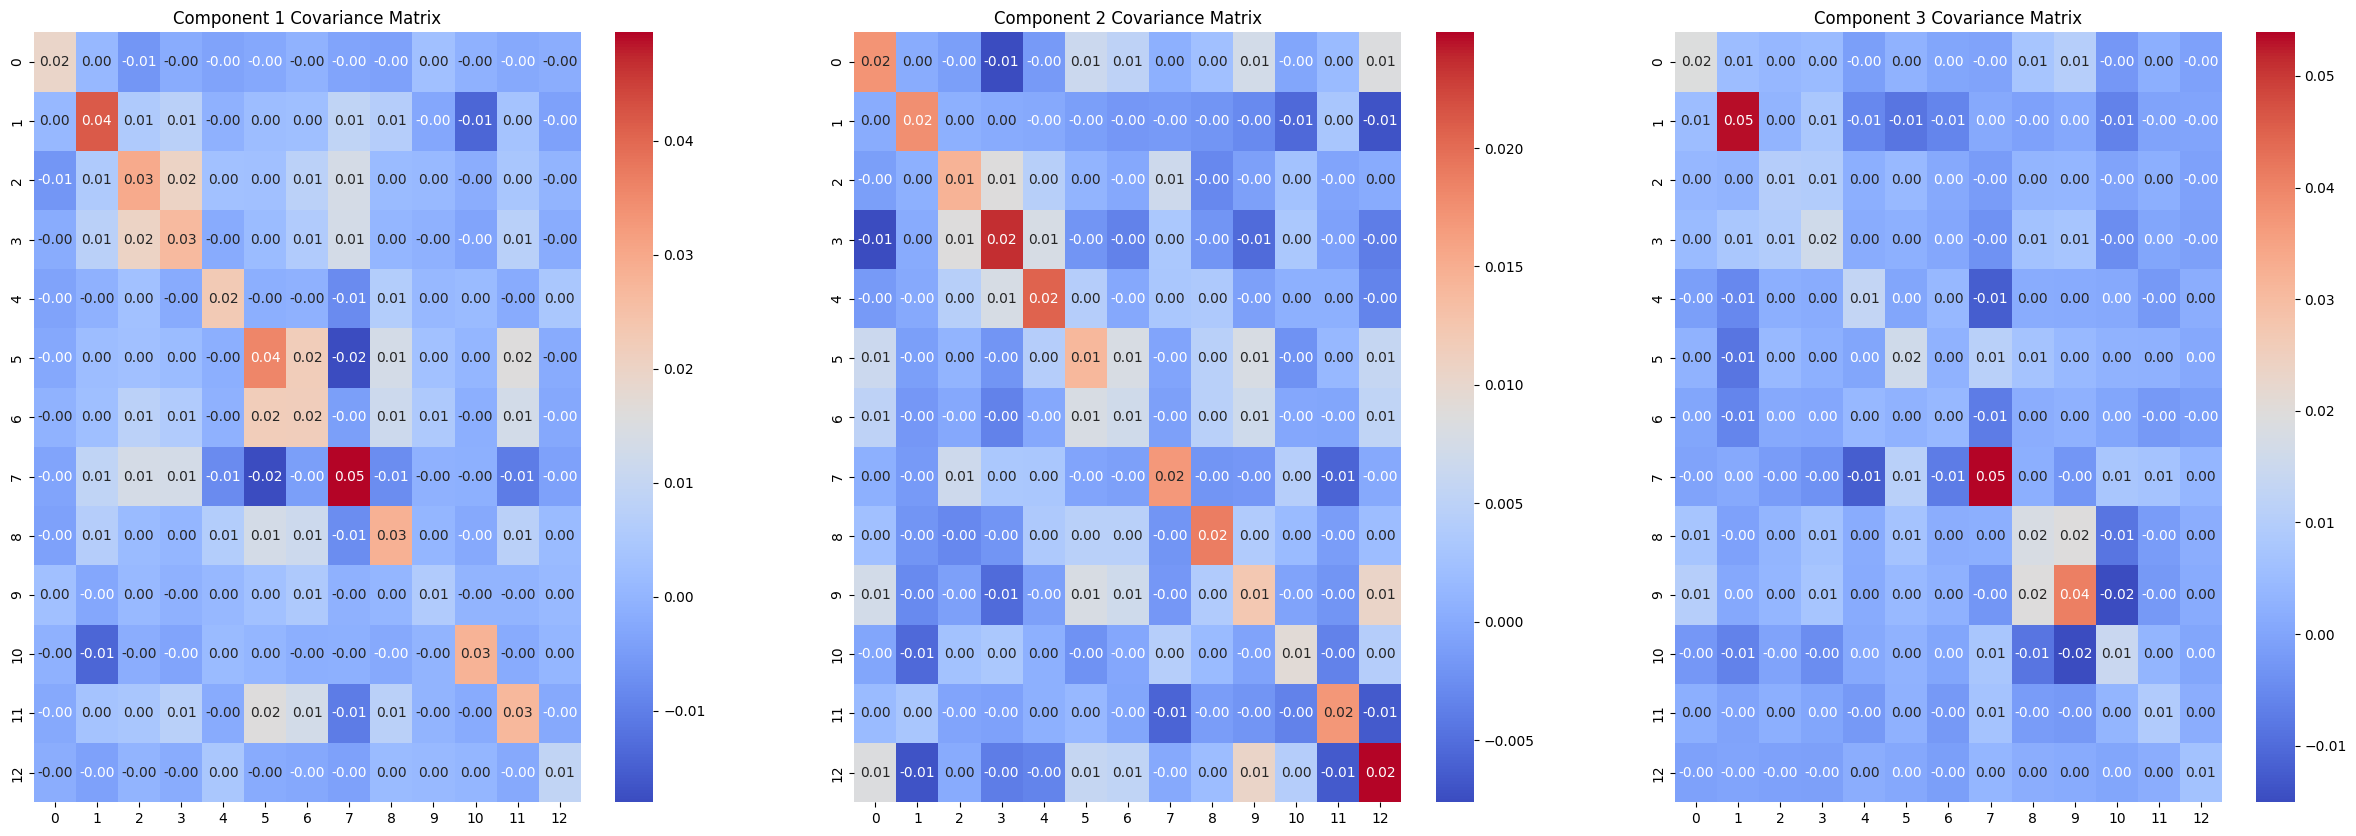

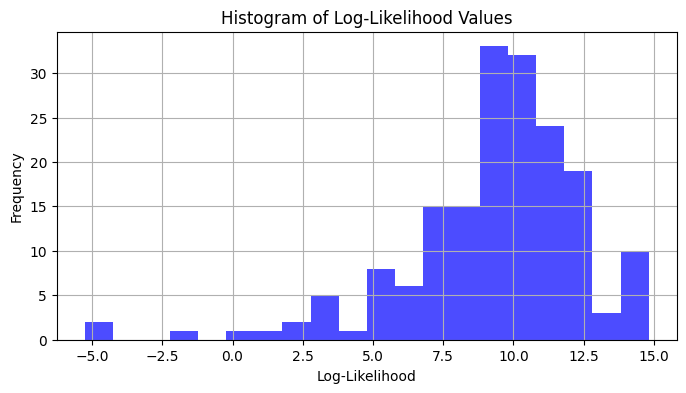

In [26]:
# Step 2

# Fit GMM with 3 components
gmm_optimal = GaussianMixture(n_components=3, random_state=42)
gmm_optimal.fit(wine_min_max_normalized_df)

# Extract means and covariances
means = gmm_optimal.means_
covariances = gmm_optimal.covariances_

# Plot covariance matrices using heatmaps
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
for i, (mean, cov) in enumerate(zip(means, covariances)):
    sns.heatmap(cov, ax=axes[i], annot=True, fmt=".2f", cmap='coolwarm')
    axes[i].set_title(f'Component {i+1} Covariance Matrix')

plt.show()

# Compute log-likelihood of each sample
log_likelihood = gmm_optimal.score_samples(wine_min_max_normalized_df)

# Plot histogram of log-likelihood values
plt.figure(figsize=(8, 4))
plt.hist(log_likelihood, bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Log-Likelihood Values')
plt.xlabel('Log-Likelihood')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


These heatmaps suprised me as there apprears to be little correlation between all the chemcial parts of the wines. There are however differences between the heatmaps indicate that there are diffent interactins between the checmicals in each cluster. As for the log-likelihood histogram it seems like the data clusters around 10 which indicates correlation between most of the wines in the dataset, with some outliers as fars as -5.0.

(d) Principal Component Analysis Use PCA to reduce the dimensions of original wine dataset.

(1) Choosing Number of Principal Component First set number of components to
6, then check the explained variance ratios of the selected components. For the convenience of visualization, you may want to reduce the number of principal components base on your findings.

(2) PCA before Cluster Choose the top two components and make 2D scatter plots
with colored labels predicted by both K-Means and GMM methods. The axes of plots are the first two principal components. Use matplotlib.patches.Ellipse to show how K-Means and GMM cluster the data.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


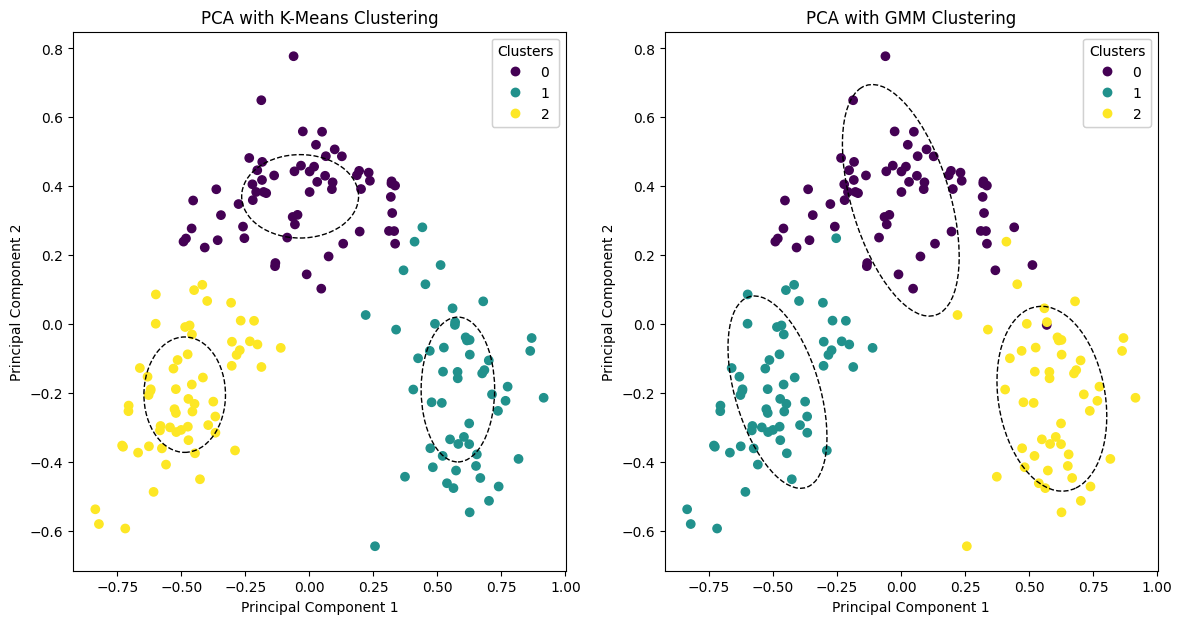

PC1:  0.40749484555191384
PC2:  0.18970351783649092
PC3:  0.08561670620841738
PC4:  0.07426677803340598
PC5:  0.055653010956107724
PC6:  0.046588371905307555


In [33]:
# Step 1

# Perform PCA with 6 components
pca = PCA(n_components=6)
wine_pca = pca.fit_transform(wine_min_max_normalized_df)
explained_variance = pca.explained_variance_ratio_

# Step 2

# Perform clustering with K-Means and GMM for visualization
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(wine_min_max_normalized_df)

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(wine_min_max_normalized_df)

# Reduce dimensions to 2 for visualization
pca_2d = PCA(n_components=2)
wine_pca_2d = pca_2d.fit_transform(wine_min_max_normalized_df)

# 2D scatter plots for PCA components with K-Means and GMM clusters
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Scatter plot for K-Means clusters
scatter = ax[0].scatter(wine_pca_2d[:, 0], wine_pca_2d[:, 1], c=kmeans_labels, cmap='viridis')
ax[0].set_title('PCA with K-Means Clustering')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')
legend1 = ax[0].legend(*scatter.legend_elements(), title="Clusters")
ax[0].add_artist(legend1)

# Adding ellipses for K-Means clusters
for i in range(3):
    cluster_data = wine_pca_2d[kmeans_labels == i]
    ellipse = patches.Ellipse(xy=(np.mean(cluster_data[:, 0]), np.mean(cluster_data[:, 1])),
                              width=np.std(cluster_data[:, 0])*2, height=np.std(cluster_data[:, 1])*2,
                              edgecolor='black', facecolor='none', linestyle='--')
    ax[0].add_patch(ellipse)

# Scatter plot for GMM clusters
scatter = ax[1].scatter(wine_pca_2d[:, 0], wine_pca_2d[:, 1], c=gmm_labels, cmap='viridis')
ax[1].set_title('PCA with GMM Clustering')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')
legend2 = ax[1].legend(*scatter.legend_elements(), title="Clusters")
ax[1].add_artist(legend2)

# Adding ellipses for GMM clusters
#debug think I borked something here check later######
# Look thru each cluster
for i in range(3):
    # Extract data points belonging to the current cluster 'i' from the 2D PCA-transformed wine data
    cluster_data = wine_pca_2d[gmm_labels == i]
    # Calculate the covariance matrix of the cluster's data points
    cov_matrix = np.cov(cluster_data, rowvar=False)
    # Compute the eigenvalues and eigenvectors of the covariance matrix
    v, w = np.linalg.eigh(cov_matrix)
    # Scale eigenvalues to represent the standard deviation of a normal distribution
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    # Get the first eigenvector and normalize it
    u = w[0] / np.linalg.norm(w[0])
    # Calculate the angle of rotation for the ellipse
    angle = np.arctan(u[1] / u[0])
    # Convert the angle to degrees
    angle = 180. * angle / np.pi
    # Create an ellipse patch representing the cluster with calculated parameters
    ellipse = patches.Ellipse(xy=(np.mean(cluster_data[:, 0]), np.mean(cluster_data[:, 1])),
                              width=v[0], height=v[1], angle=np.degrees(angle),
                              edgecolor='black', facecolor='none', linestyle='--')

    ax[1].add_patch(ellipse)


plt.show()

# Output the explained variance ratios for the initial 6 components
print("PC1: ", explained_variance[0])
print("PC2: ", explained_variance[1])
print("PC3: ", explained_variance[2])
print("PC4: ", explained_variance[3])
print("PC5: ", explained_variance[4])
print("PC6: ", explained_variance[5])


There are 2 main take aways from the outputs here the first is that the first 2 components make up almost 60% of the total variance in the dataset. The second take away comes from the scatter plots. I think PCA plus K-means clustering worked better than the PCA with Gaussian mixture model as there is are no overlapping data points from different clusters in the K-means plot and there can be clear boundaries drawn in it unlike in the Gaussian one.

(e) Evaluation Finally, use Silhouette score to evaluate the k-means clustering, Gaussian mixture model, k-means + PCA and GMM + PCA methods. Note that you can reset the number of PCA components now.



In [35]:
# Set number of clusters
n_clusters = 3

# Original K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(wine_min_max_normalized_df)
kmeans_silhouette = silhouette_score(wine_min_max_normalized_df, kmeans_labels)

# Original GMM
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(wine_min_max_normalized_df)
gmm_silhouette = silhouette_score(wine_min_max_normalized_df, gmm_labels)

# PCA transformation
pca = PCA(n_components=0.95)
wine_pca = pca.fit_transform(wine_min_max_normalized_df)

# K-Means on PCA-reduced data
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(wine_pca)
kmeans_pca_silhouette = silhouette_score(wine_pca, kmeans_pca_labels)

# GMM on PCA-reduced data
gmm_pca = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_pca_labels = gmm_pca.fit_predict(wine_pca)
gmm_pca_silhouette = silhouette_score(wine_pca, gmm_pca_labels)

# Print Silhouette scores
print("Silhouette Score for K-Means on original data:",kmeans_silhouette)
print("Silhouette Score for GMM on original data:",  gmm_silhouette)
print("Silhouette Score for K-Means on PCA-reduced data:", kmeans_pca_silhouette)
print("Silhouette Score for GMM on PCA-reduced data:", gmm_pca_silhouette)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K-Means on original data: 0.3008938518500134
Silhouette Score for GMM on original data: 0.2927455860995386
Silhouette Score for K-Means on PCA-reduced data: 0.3139449543758656
Silhouette Score for GMM on PCA-reduced data: 0.3064026789131947


All of these scores seem to be clustered around .3 which is good as it indicates consistency between the vasrious cluster types. Considering a score close to 0 indicates that clusters may be overlapping this score could be better however, at the very list there are no scores below 0 which would indicate that some samples may be in the wrong cluster. Finally I noticed that the PCA reduced models both performed better than their original data counter parts.